# flood_prediction

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('kerala.csv.xls')
data


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,YES
1,KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,YES
2,KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,YES
3,KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,YES
4,KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,YES
114,KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,NO
115,KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,NO
116,KERALA,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1,NO


the dataset contains 118 rows and 16 columns. the column’s information is as follows




In [6]:
data.shape

(118, 16)

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,118.0,1959.500000,34.207699,1901.0,1930.250,1959.50,1988.750,2018.0
JAN,118.0,12.218644,15.473766,0.0,2.175,5.80,18.175,83.5
FEB,118.0,15.633898,16.406290,0.0,4.700,8.35,21.400,79.0
MAR,118.0,36.670339,30.063862,0.1,18.100,28.40,49.825,217.2
APR,118.0,110.330508,44.633452,13.1,74.350,110.40,136.450,238.0
MAY,118.0,228.644915,147.548778,53.4,125.050,184.60,264.875,738.8
JUN,118.0,651.617797,186.181363,196.8,535.550,625.60,786.975,1098.2
JUL,118.0,698.220339,228.988966,167.5,533.200,691.65,832.425,1526.5
AUG,118.0,430.369492,181.980463,178.6,316.725,386.25,500.100,1398.9
SEP,118.0,246.207627,121.901131,41.3,155.425,223.55,334.500,526.7


In [45]:
data.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', ' ANNUAL RAINFALL', 'FLOODS'],
      dtype='object')

# Exploratory Data Analysis

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, KERALA to KERALA
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              118 non-null    int64  
 1   JAN               118 non-null    float64
 2   FEB               118 non-null    float64
 3   MAR               118 non-null    float64
 4   APR               118 non-null    float64
 5   MAY               118 non-null    float64
 6   JUN               118 non-null    float64
 7   JUL               118 non-null    float64
 8   AUG               118 non-null    float64
 9   SEP               118 non-null    float64
 10  OCT               118 non-null    float64
 11  NOV               118 non-null    float64
 12  DEC               118 non-null    float64
 13   ANNUAL RAINFALL  118 non-null    float64
 14  FLOODS            118 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 14.8+ KB


In [48]:
data.isna().sum()

YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

In [49]:
data.duplicated().sum()

0

In [50]:
data['FLOODS'].value_counts()

YES    60
NO     58
Name: FLOODS, dtype: int64

<Axes: xlabel='FLOODS', ylabel='count'>

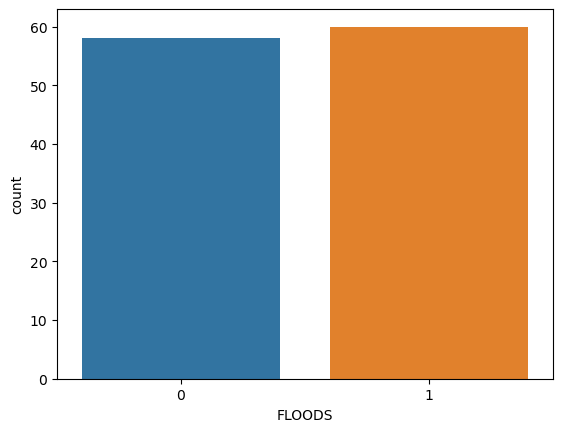

In [7]:
sns.countplot(x ='FLOODS', data =data)


In [13]:
#data['FLOODS'].replace(('YES', 'NO'), (1, 0), inplace=True)
#data

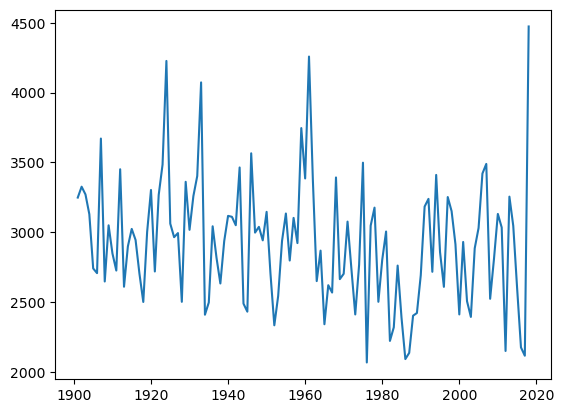

In [52]:
YEAR = data['YEAR']
Annual_Rainfall=data[' ANNUAL RAINFALL']

# Create a line plot
plt.plot(YEAR, Annual_Rainfall)

# Show the plot
plt.show()

In [54]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
SUBDIVISION,,,,,,,,,,,,,,,
KERALA,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
KERALA,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
KERALA,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
KERALA,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
KERALA,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KERALA,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
KERALA,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
KERALA,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0


In [58]:

#data=data.set_index('YEAR',inplace=True)
data1 = data.set_index('YEAR')
data1


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
YEAR,,,,,,,,,,,,,,
1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4,1
2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6,0
2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6,0


In [59]:

data2=data1[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
data2


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
YEAR,,,,,,,,,,,,
1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4
1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5
1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0
1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3
1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2
2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4
2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6


<Axes: xlabel='YEAR'>

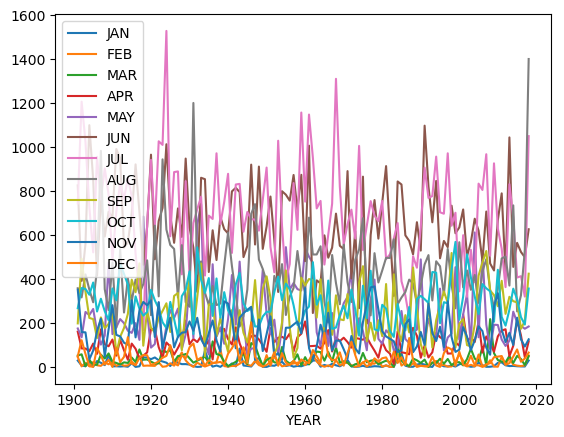

In [60]:
data2.plot(kind='line')

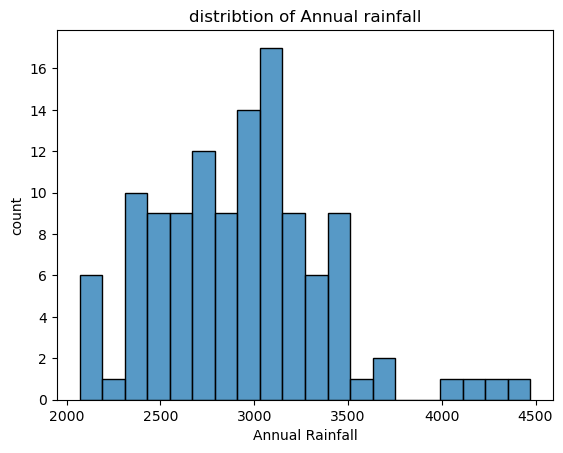

In [61]:
sns.histplot(data[' ANNUAL RAINFALL'],bins=20)
plt.title('distribtion of Annual rainfall')
plt.xlabel('Annual Rainfall')
plt.ylabel('count')
plt.show()

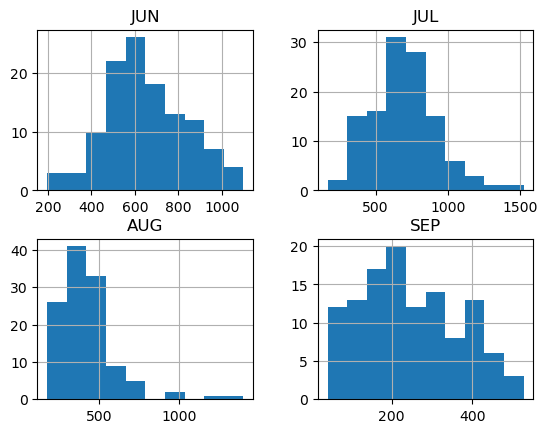

In [3]:
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()

probability

In [3]:

data["JUN_GT_500"]=(data["JUN"]>500).astype("int")
data["JUL_GT_500"]=(data["JUL"]>500).astype("int")

In [6]:
data_small = data.loc[:,['YEAR','JUN_GT_500','JUL_GT_500','FLOODS']]
data_small

,YEAR,JUN_GT_500,JUL_GT_500,FLOODS
SUBDIVISION,,,,
KERALA,1901,1,1,YES
KERALA,1902,0,1,YES
KERALA,1903,1,1,YES
KERALA,1904,1,1,YES
KERALA,1905,1,1,NO
...,...,...,...,...
KERALA,2014,0,1,YES
KERALA,2015,1,0,NO
KERALA,2016,1,0,NO


In [8]:
pd.crosstab(data_small["FLOODS"],data_small["JUN_GT_500"],margins=True)

JUN_GT_500,0,1,All
FLOODS,,,
NO,19,39,58
YES,6,54,60
All,25,93,118


P(A) = Probability of Flooding

P(B) = Probability of having more than 500 mm rain

P(AnB) = Probability flooding and having more than 500 mm rain in june

P(A|B) = probability flooding given it rained more than 500 mm in june

In [9]:
60/118
#P(A)=60/118=0.5084745762711864

0.5084745762711864

In [10]:
93/118
#P(B)=93/118=0.788135593220339

0.788135593220339

In [11]:
54/118
#P(AnB)=54/118=0.4576271186440678

0.4576271186440678

In [12]:
0.4576271186440678/0.788135593220339
#P(A|B)=0.4576271186440678/0.788135593220339=0.5806451612903226

0.5806451612903226

probability flooding given it rained more than 500 mm in june is 58 percentage

P(A) = Probability of Flooding

P(B) = Probaility of having more than 500 mm rain in JuLY

p(AnB) = Probabiity of flooding and having more than 500mm rain in JuLY

P(A|B) = Probabiity of flooding given it rained more than 500 mm in JuLY

In [15]:
pd.crosstab(data_small["JUL_GT_500"],data_small["FLOODS"],margins=True)

FLOODS,NO,YES,All
JUL_GT_500,,,
0,19,3,22
1,39,57,96
All,58,60,118


In [16]:
60/118
#P(A)=60/118

0.5084745762711864

In [20]:
96/118
#P(B)=96/118

0.8135593220338984

In [21]:
57/118
#P(AnB)=57/118

0.4830508474576271

In [19]:
#P(A|B)=0.4830508474576271/0.8135593220338984
0.4830508474576271/0.8135593220338984


0.59375

probability flooding given it rained more than 500 mm in june is 59 percentage

In [6]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
data["FLOODS"]=lab_enc.fit_transform(data["FLOODS"])


In [7]:
x = data.drop(columns=["SUBDIVISION","FLOODS"])
y = data["FLOODS"]
y

0      1
1      1
2      1
3      1
4      0
      ..
113    1
114    0
115    0
116    0
117    1
Name: FLOODS, Length: 118, dtype: int32

In [8]:
x

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4
114,2015,3.1,5.8,50.1,214.1,201.8,563.6,406.0,252.2,292.9,308.1,223.6,79.4,2600.6
115,2016,2.4,3.8,35.9,143.0,186.4,522.2,412.3,325.5,173.2,225.9,125.4,23.6,2176.6
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1


Spliting The Data for Testing And Training

In [9]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.25,random_state=10)

In [18]:
x_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7
75,1976,0.1,1.5,21.0,134.5,75.8,196.8,641.5,342.6,116.2,221.3,286.7,30.8,2068.8
70,1971,31.6,18.5,20.0,113.0,317.5,889.6,648.6,385.2,331.2,220.9,38.3,62.3,3076.8
106,2007,0.5,5.6,7.3,138.5,192.7,705.9,966.3,489.6,526.7,357.2,87.4,11.9,3489.6
96,1997,2.1,1.5,36.1,60.6,133.6,544.2,970.5,536.0,292.2,288.9,298.4,88.4,3252.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2014,4.6,10.3,17.9,95.7,251.0,454.4,677.8,733.9,298.8,355.5,99.5,47.2,3046.4
64,1965,9.1,0.9,28.3,109.8,214.5,597.7,465.1,296.1,150.1,183.7,131.7,155.5,2342.4
15,1916,0.0,7.8,22.0,82.4,199.0,920.2,513.9,396.9,339.3,320.7,134.3,8.9,2945.3
100,2001,16.5,28.3,7.0,238.0,238.6,715.3,598.5,361.3,216.8,319.6,181.0,10.1,2931.1


In [12]:
x_test

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL
56,1957,1.2,16.0,25.7,70.2,381.2,872.0,835.3,358.8,41.3,280.1,192.5,28.9,3103.3
89,1990,14.9,4.8,18.0,41.8,488.5,528.6,635.4,370.8,103.3,323.2,158.8,5.2,2693.1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6
45,1946,1.8,5.4,108.4,139.8,83.0,919.0,671.7,695.6,199.4,266.1,273.0,202.3,3565.5
26,1927,18.8,35.3,49.6,86.5,265.4,720.2,888.2,315.0,335.6,135.8,137.6,6.8,2994.7
116,2017,1.9,6.8,8.9,43.6,173.5,498.5,319.6,531.8,209.5,192.4,92.5,38.1,2117.1
69,1970,12.9,17.6,25.8,132.7,289.1,535.3,558.1,554.8,212.5,278.3,80.5,5.7,2703.5
10,1911,3.0,4.3,18.2,51.0,180.6,990.0,705.3,178.6,60.2,302.3,145.7,87.6,2726.7
90,1991,10.9,4.4,33.2,97.0,113.4,1096.1,905.5,465.5,48.5,307.8,99.9,2.3,3184.5
73,1974,1.6,5.4,16.0,128.0,221.5,266.9,1004.2,533.6,383.6,142.1,61.0,3.6,2767.4


In [16]:
x_test.shape

(30, 14)

In [13]:
y_train

66     0
22     1
36     0
55     0
81     0
      ..
106    1
14     1
92     0
51     0
102    0
Name: FLOODS, Length: 88, dtype: int32

In [14]:
y_test

56     1
89     0
4      0
45     1
26     1
116    0
69     0
10     0
90     1
73     0
18     1
111    0
11     1
96     1
42     1
31     1
88     0
0      1
97     1
109    1
64     0
40     1
95     0
53     1
44     0
12     0
15     1
70     1
107    0
24     1
Name: FLOODS, dtype: int32

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logicreg=LogisticRegression()

In [36]:
logicreg

LogisticRegression()

In [22]:
logicreg.fit(x_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_predict=logicreg.predict(x_test)

In [24]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

In [25]:
acc=accuracy_score(y_test,y_predict)

In [26]:
acc

0.9666666666666667

In [27]:
con=confusion_matrix(y_test,y_predict)

In [28]:
con

array([[13,  0],
       [ 1, 16]], dtype=int64)

In [29]:
f1=f1_score(y_test,y_predict)

In [30]:
f1

0.9696969696969697

In [31]:
pre=precision_score(y_test,y_predict)

In [35]:
pre

1.0

In [33]:
recall=recall_score(y_test,y_predict)

In [34]:
recall

0.9411764705882353